   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
Model: "my_first_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 128)               768       
                                                                 
 dense_35 (Dense)            (None, 1)                 12

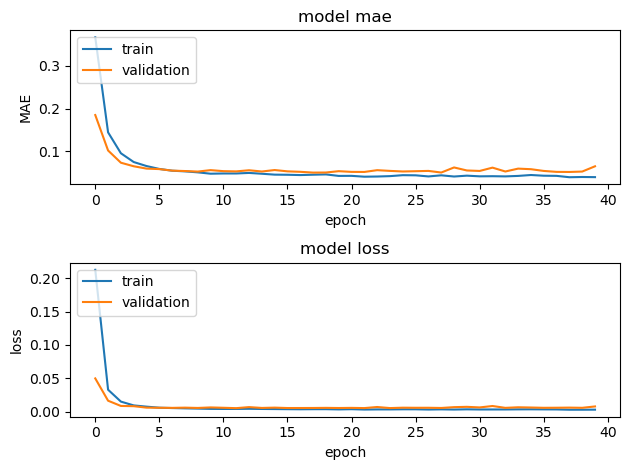

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.optimizers import Adam

df= pd.read_csv(r'C:\Users\weije\Desktop\Kaggle Data\Admission_Predict.csv')
print(df.head())

def design_model(features):
  model = Sequential(name = "my_first_model")
  input = InputLayer(input_shape=(features.shape[1],)) 
  model.add(input) 
  model.add(Dense(128, activation='relu')) 
  model.add(Dense(1)) 
  opt = Adam(learning_rate=0.1)
  model.compile(loss='mse',  metrics=['mae'], optimizer=opt)
  return model

features = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA']]
labels = df['Chance of Admit ']

features = pd.get_dummies(features)
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.20, random_state=42) 
ct = ColumnTransformer([('standardize', StandardScaler(), ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA'])], remainder='passthrough')
features_train = ct.fit_transform(features_train)
features_test = ct.transform(features_test)

model = design_model(features_train)
print(model.summary())

# define early stopping callback
earlystop = EarlyStopping(monitor='val_loss', patience=5)

# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(features_train, labels_train, epochs=40, batch_size=4, verbose=1, validation_data=(features_test, labels_test))

val_mse, val_mae = model.evaluate(features_test, labels_test, verbose = 0)
print("MAE: ", val_mae)

fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')
 
  # Plot loss and val_loss over each epoch
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')
 
# used to keep plots from overlapping each other  
fig.tight_layout()
fig.savefig

predicted_values = model.predict(features_test) 
print(r2_score(labels_test, predicted_values))

MAE:  0.14590099453926086
